In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import rospy
import rosbag
from bagpy import bagreader

### topic list (using bagpy)
not needed for evaluation

In [2]:
circuit_3_bag = bagreader('../bags/circuit_3.bag')
pd.set_option('display.max_rows', 500)
display(circuit_3_bag.topic_table)

[INFO]  Data folder ../bags/circuit_3 already exists. Not creating.


,Topics,Types,Message Count,Frequency
0,/amcl/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
1,/amcl/parameter_updates,dynamic_reconfigure/Config,1,NaN
2,/amcl_pose,geometry_msgs/PoseWithCovarianceStamped,92,1.626142
3,/battery_state,sensor_msgs/BatteryState,1882,22.291512
4,/cmd_vel,geometry_msgs/Twist,7188,97.660054
5,/cmd_vel_rc100,geometry_msgs/Twist,1881,22.332995
6,/col_cmd,geometry_msgs/Twist,361,4.986455
7,/diagnostics,diagnostic_msgs/DiagnosticArray,211,3.204181
8,/firmware_version,turtlebot3_msgs/VersionInfo,73,0.995193
9,/homing_cmd,geometry_msgs/Twist,7111,96.694193


### rosbag aux. function

In [3]:
def create_df_from_twist(bag, twist_topic):
    twist_df = pd.DataFrame(columns=['time', 'v', 'omega'])
    for topic, msg, t in bag.read_messages(topics=[twist_topic]):
        time = rospy.Time.to_sec(t) # convert to float
        v = msg.linear.x
        omega = msg.angular.z
        twist_df = twist_df.append({'time': time, 'v': v, 'omega': omega}, ignore_index=True)
    return twist_df

### twist topics

In [4]:
bag_circuit_3 = rosbag.Bag('../bags/circuit_3.bag')

df_sloppy_joy_cmd = create_df_from_twist(bag_circuit_3, '/sloppy_joy_cmd') 
df_nav_cmd = create_df_from_twist(bag_circuit_3, '/nav_cmd')
df_joy_cmd = create_df_from_twist(bag_circuit_3, '/joy_cmd')
df_homing_cmd = create_df_from_twist(bag_circuit_3, '/homing_cmd')
df_cmd_vel_rc100 = create_df_from_twist(bag_circuit_3, '/cmd_vel_rc100')
df_cmd_vel = create_df_from_twist(bag_circuit_3, '/cmd_vel')
df_col_cmd = create_df_from_twist(bag_circuit_3, '/col_cmd')

display(df_sloppy_joy_cmd.head())

,time,v,omega
0,1.626076e+09,0.003729,-0.651333
1,1.626076e+09,-0.000802,0.171713
2,1.626076e+09,-0.012532,0.203863
3,1.626076e+09,0.010644,-0.009861
4,1.626076e+09,0.003884,0.297391


### plot omega

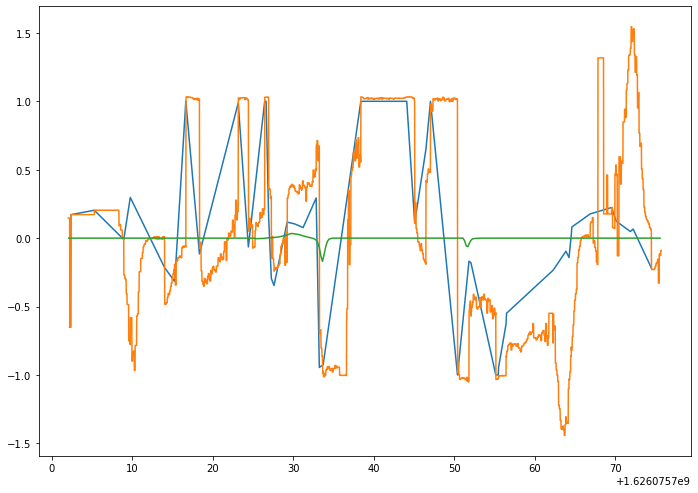

In [5]:
plt.figure(figsize=(11.69,8.27))
plt.plot(df_sloppy_joy_cmd['time'], df_sloppy_joy_cmd['omega'])
plt.plot(df_cmd_vel['time'], df_cmd_vel['omega'])
plt.plot(df_col_cmd['time'], df_col_cmd['omega'])
plt.show()

### 

In [6]:
# create a HTML file for easy access (without jupyter)
os.system('jupyter nbconvert --to html preprocessing.ipynb') 

0